# Métodos Runge-Kutta

En el método de Euler, se resuelven ecuaciones diferenciales tipo $y^\prime = f(x,y)$ a partir de la serie de Taylor truncada a primer órden, 

$$
y(x+h) - y(h) = \int_{x}^{x+h} y^\prime dx = \int_{x}^{x+h} f(x,y) dx 
$$

que es el área del panel debajo de la gráfica de $y^\prime(x)$. La expresión de Euler nos permite aproximar el área con el rectángulo sombreado. El área entre el rectángulo y la gráfica es el error de truncamiento, que es proporcional a la pendiente de la gráfica $(y^\prime)^\prime = y^{\prime\prime}$.

![DIV](fig/RK-1.jpg)


El método de Euler esta clasificado como método de primer órden porque el error acumulativo de truncamiento se comporta como $\mathbf{h}$ y su base es la serie de Taylor truncada

$$
\mathbf{y}(x+h) = \mathbf{y}(x) + \mathbf{y}^{\prime}(x) ~ h.
$$

La precisión en la integración numérica puede ser mejorada, quedándonos con mas términos de la serie de Taylor, por ejemplo truncarla al órden $n$-ésimo

$$
\mathbf{y}(x+h) = \mathbf{y}(x) + \mathbf{y}^{\prime}(x) ~ h + \frac{1}{2!}\mathbf{y}^{\prime\prime}(x) ~ h^2 + \cdots + \frac{1}{n!}\mathbf{y}^{(n)}(x) ~ h^n.
$$

Pero ello implicaría que tenemos que obtener las expresiones para las derivadas de órden más alto, diferenciando $\mathbf{y}^\prime = \mathbf{F}(x,\mathbf{y})$ y escribiendo subrutinas para evaluarlas. 

Podemos evitar la necesidad de hacer esto, si usamos los métodos Runge-Kutta, ya que no requieren el cálculo de dichas derivadas de órdenes mayores.


## Métodos Runge-Kutta de segundo órden


Para tener un método de Euler modificado de segundo órden, necesitaríamos tener la serie de Taylor truncada 

$$
\mathbf{y}(x+h) = \mathbf{y}(x) + \mathbf{y}^{\prime}(x) ~ h + \frac{1}{2!}\mathbf{y}^{\prime\prime}(x) ~ h^2
$$

y ello implicaría que si $\mathbf{y}^\prime = \mathbf{F}(x,\mathbf{y})$, entonces la ecuación anterior se convierte en

\begin{equation}
\mathbf{y}(x+h) = \mathbf{y}(x) + \mathbf{F}(x,\mathbf{y}) ~ h + \frac{1}{2}\mathbf{F}^{\prime}(x,\mathbf{y}) ~ h^2. \label{eq:rk1}
\end{equation}

Si además asumimos que existe una versión extendida de la fórmula de Euler que incluye una evaluación en otro punto del dominio para $\mathbf{F}$

\begin{equation}
\mathbf{y}(x+h) = \mathbf{y}(x) + c_0\mathbf{F}(x,\mathbf{y}) ~ h + c_1\mathbf{F}\left[x+ph,\mathbf{y} + qh\mathbf{F}(x,\mathbf{y})\right] ~ h, \label{eq:rk2}
\end{equation}

podemos intentar encontrar los parámetros $c_0,c_1,p,q$, haciendo una equivalencia entre las dos ecuaciones.

Primero, noten que para $n$ ecuaciones diferenciales de primer órden
$$
\mathbf{F}^\prime(x,\mathbf{y}) = \frac{\partial \mathbf{F} }{\partial x} + \sum_{i=0}^{n-1} \frac{\partial \mathbf{F} }{\partial y_i} y_i^\prime = \frac{\partial \mathbf{F} }{\partial x} + \sum_{i=0}^{n-1} \frac{\partial \mathbf{F} }{\partial y_i} \mathbf{F}_i(x,\mathbf{y}).
$$
Entonces la expresión de Euler puede reescribirse como

\begin{equation}
\mathbf{y}(x+h) = \mathbf{y}(x) + \mathbf{F}(x,\mathbf{y}) ~ h + \frac{1}{2}\left(  \frac{\partial \mathbf{F} }{\partial x} + \sum_{i=0}^{n-1} \frac{\partial \mathbf{F} }{\partial y_i} \mathbf{F}_i(x,\mathbf{y}) \right) ~ h^2. \label{eq:rk3}
\end{equation}


Por otro lado noten que el último término de la expresión de Euler extendida, lo podemos reescribir usando serie de Taylor 

$$
\mathbf{F}\left[x+ph,\mathbf{y} + qh\mathbf{F}(x,\mathbf{y})\right] = \mathbf{F}(x,\mathbf{y}) + \frac{\partial \mathbf{F} }{\partial x} ~ph + qh~\sum_{i=0}^{n-1} \frac{\partial \mathbf{F} }{\partial y_i} \mathbf{F}_i(x,\mathbf{y}),
$$

por lo que dicha ecuación queda

\begin{equation}
\mathbf{y}(x+h) = \mathbf{y}(x) + (c_0+c_1)\mathbf{F}(x,\mathbf{y}) ~ h + c_1\left[ \frac{\partial \mathbf{F} }{\partial x} ~ph + qh~\sum_{i=0}^{n-1} \frac{\partial \mathbf{F} }{\partial y_i} \mathbf{F}_i(x,\mathbf{y}) \right] ~ h. \label{eq:rk4}
\end{equation}


Comparen los ambos resultados, podemos ver que son idénticos si:

\begin{equation}
c_0+c_1=1 ~~~~~ c_1p=\frac{1}{2} ~~~~~ c_1q = \frac{1}{2}
\end{equation}

Esto representa 3 ecuaciones con 4 parámetros desconocidos, lo que permite tener un parámetro libre. Algunas de las opciones populares son:

1. Método de Euler modificado: $c_0=0$, $c_1=1$,, $p=1/2$, $q=1/2$
2. Método de Heun: $c_0=1/2$, $c_1=1/2$, $p=1$, $q=1$
3. Método de Ralston: $c_0=1/3$, $c_1=2/3$, $p=3/4$,  $q=3/4$

Todos estos métodos se clasifican como métodos Runge-Kutta de segundo órden y ninguno de ellos tiene superioridad sobre el otro. 


Escogiendo el primer conjunto de parámetros y sustituyendo en la expresión de Euler extendida, tenemos que:

\begin{equation}
\mathbf{y}(x+h) = \mathbf{y}(x) + \mathbf{F}\left[x+\frac{h}{2},\mathbf{y} + \frac{h}{2}\mathbf{F}(x,\mathbf{y})\right] ~ h. \label{eq:rk5}
\end{equation}

Esta fórmula de integración puede evaluarse de manera más conveniente con la siguiente secuencia de operaciones:

\begin{eqnarray}
\mathbf{K}_0 &=& h~ \mathbf{F}(x,\mathbf{y}), \nonumber \\
\mathbf{K}_1 &=& h~ \mathbf{F}\left(x+\frac{h}{2},\mathbf{y} + \frac{1}{2}\mathbf{K}_0\right), \label{eq:rk6}\\
\mathbf{y}(x+h) &=& \mathbf{y}(x) + \mathbf{K}_1. \nonumber
\end{eqnarray}
	
Ahora con las expresiones del método de Euler modificado, $K_0$ estima $y$ en el punto medio del panel con la fórmula de Euler $y(x+h/2) = y(x) + h/2~f(x,y) = y(x) + K_0/2$ y $K_1$ aproxima el área del panel del rectángulo sombreado. Aqui el error es proporcional a la curvatura $(y^\prime)^{\prime\prime} = y^{\prime\prime\prime}$.

![DIV](fig/RK-2.jpg)

Los métodos de segundo órden no son tan populares en aplicaciones de cómputo. La mayoría preferimos las fórmulas de integración de los métodos de cuarto órden, porque se logra una buena precisión con menos esfuerzo computacional.

Por ello, no vamos a implementar un algoritmo de segundo órden, y nos vamos directo a la implementación del método Runge-Kutta de cuarto órden.

## Método de Runge-Kutta de cuarto orden


Este método se obtiene siguiendo los pasos anteriores, pero incluyendo un siguiente nivel en el órden de equivalencias entre representaciones de serie de Taylor para incluir derivadas de órden más alto. De nuevo, las fórmulas de integración contienen relaciones entre parámetros y parámetros libres. La versión más popular que se usa en la literatura se conoce simplemente como *método Runge-Kutta* y contiene la siguiente secuencia de operaciones:

\begin{eqnarray}
\mathbf{K}_0 &=& h~ \mathbf{F}(x,\mathbf{y}), \nonumber \\
\mathbf{K}_1 &=& h~ \mathbf{F}\left(x+\frac{h}{2},\mathbf{y} + \frac{1}{2}\mathbf{K}_0\right), \nonumber\\
\mathbf{K}_2 &=& h~ \mathbf{F}\left(x+\frac{h}{2},\mathbf{y} + \frac{1}{2}\mathbf{K}_1\right),  \label{eq:rk7} \\
\mathbf{K}_3 &=& h~ \mathbf{F}(x+h,\mathbf{y} + \mathbf{K}_2), \nonumber \\
\mathbf{y}(x+h) &=& \mathbf{y}(x) + \frac{1}{6} \left(\mathbf{K}_0 + 2\mathbf{K}_1 + 2\mathbf{K}_2 + \mathbf{K}_3\right). \nonumber
\end{eqnarray}

Noten que ya no podemos estimar el error de truncamiento y se tiene que estimar el tamaño del paso de integración ó prueba/error $\to$ métodos adaptativos. Lo único que tendríamos que agregar a las rutinas de Euler, seria la modificación a la evaluación de $y(x+h)$ que nos da el conjunto para $K$

# Ejemplo 1: Método de RK4


Resolver el problema de valor inicial

$$
y^{\prime\prime} = -0.1y^{\prime} - x ~~~ \mbox{con} ~~~ y(0)=0, y^\prime(0)=1
$$

de $x=0$ hasta $x=2$ con el paso $h=0.05$. Grafica la $y$ calculada junto con la solución analítica

$$
y = 100 x - 5x^2 + 990(e^{-0.1x} - 1).
$$

In [1]:
import matplotlib.pyplot as plt
from math import *
import numpy as np
def Run_Kut4(F,x,y,xStop,h):
  def run_kut4(F,x,y,h):
    K0 = h*F(x,y)
    K1 = h*F(x + h/2.0, y + K0/2.0)
    K2 = h*F(x + h/2.0, y + K1/2.0)
    K3 = h*F(x + h, y + K2)
    return (K0 + 2.0*K1 + 2.0*K2 + K3)/6.0
  X = []
  Y = []
  X.append(x)
  Y.append(y)
  while x < xStop:
    h = min(h,xStop - x)
    y = y + run_kut4(F,x,y,h)
    x=x+h
    X.append(x)
    Y.append(y)
  return np.array(X),np.array(Y)

def imprimeSol(X,Y,frec):
 
  def imprimeEncabezado(n):
    print("\n x ",end=" ")
    for i in range (n):
      print(" y[",i,"] ",end=" ")
    print()

  def imprimeLinea(x,y,n):
    print("{:13.4e}".format(x),end=" ")
    for i in range (n):
      print("{:13.4e}".format(y[i]),end=" ")
    print() 
  
  m = len(Y)
  try: n = len(Y[0])
  except TypeError: n = 1
  if frec == 0: frec = m
  imprimeEncabezado(n)
  for i in range(0,m,frec):
   imprimeLinea(X[i],Y[i],n)
  if i != m - 1: imprimeLinea(X[m - 1],Y[m - 1],n)


La solución es

 x   y[ 0 ]   y[ 1 ]  
   0.0000e+00    0.0000e+00    1.0000e+00 
   2.0000e-01    1.9669e-01    9.6033e-01 
   4.0000e-01    3.8154e-01    8.8185e-01 
   6.0000e-01    5.4689e-01    7.6531e-01 
   8.0000e-01    6.8518e-01    6.1148e-01 
   1.0000e+00    7.8904e-01    4.2110e-01 
   1.2000e+00    8.5123e-01    1.9488e-01 
   1.4000e+00    8.6465e-01   -6.6465e-02 
   1.6000e+00    8.2235e-01   -3.6224e-01 
   1.8000e+00    7.1751e-01   -6.9175e-01 
   2.0000e+00    5.4345e-01   -1.0543e+00 


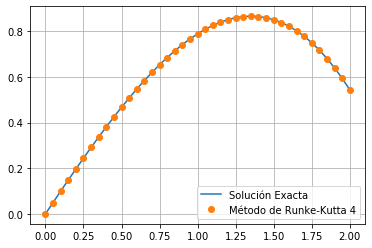

In [2]:
def F(x,y):
  F=np.array([y[1],-0.1*y[1]-x])
  return F

y=np.array([0.0,1.0])
X,Y=Run_Kut4(F,0.0,y,2.0,0.05)
print("La solución es")
imprimeSol(X,Y,4)
def yExacta(x):
  return 100.0*x-5.0*x**2+990.0*(e**(-0.1*x)-1)
x1=np.arange(0.0,2.0,0.001)
plt.plot(x1,yExacta(x1),label="Solución Exacta")
plt.plot(X,Y[:,0],"o",label="Método de Runke-Kutta 4")
plt.grid()
plt.legend()
plt.show()
